In [87]:
import pandas as pd
import numpy as np

# 导入matplotlib.pyplot绘图库，其中plt.plot()是最常用的绘图函数之一
import matplotlib.pyplot as plt

import seaborn as sns

sns.set() # 默认用seaborn的绘图样式

plt.rcParams["font.sans-serif"]=["Microsoft YaHei"] #设置字体。如果不设置，中文会乱码。这里采用微软雅黑'Microsoft YaHei'，如果显示不正常，也可以使用黑体'SimHei'或者宋体'SimSun'等
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

# 绘图使用'svg'后端：svg是矢量格式，可以任意缩放均保持清晰，各种屏幕的显示良好。
%config InlineBackend.figure_formats = ['svg']

In [88]:
def read_expt_xlsx(path):
    df = pd.read_excel('data/6-6日实验数据94人.xlsx')
    df = df.dropna(how='all',axis=1)
    df.columns = pd.MultiIndex.from_tuples([tuple(col.split('.')) for col in df.columns])
    return df

In [89]:
df = read_expt_xlsx('data/6-6日实验数据94人.xlsx')
df

participant                                                           \
   id_in_session      code  label _is_bot _index_in_pages _max_page_index   
             NaN       NaN    NaN     NaN             NaN             NaN   
             NaN       NaN    NaN     NaN             NaN             NaN   
0              1  jzjabtoc  pc_01       0             117             117   
1              2  m05vizam  pc_02       0             117             117   
2              3  o135ko6y  pc_03       0             117             117   
3              4  a2mdbuef  pc_04       0             117             117   
4              5  iu4vt42g  pc_05       0             117             117   
..           ...       ...    ...     ...             ...             ...   
89            18  pc2dx6f4  pc_18       0             117             117   
90            19  ye4pfqln  pc_19       0             117             117   
91            20  ch9xbbhk  pc_20       0             117             117   
92            21  c1356c92  pc_21       0             117             117   
93            22  trawnlov  pc_22       0             117             117   

                                                                         ...  \
   _current_app_name _current_page_name        time_started_utc visited  ...   
                 NaN                NaN                     NaN     NaN  ...   
                 NaN                NaN                     NaN     NaN  ...   
0    results_payment            Results 2023-06-06 02:06:33.102       1  ...   
1    results_payment            Results 2023-06-06 02:06:35.983       1  ...   
2    results_payment            Results 2023-06-06 02:06:40.522       1  ...   
3    results_payment            Results 2023-06-06 02:06:43.970       1  ...   
4    results_payment            Results 2023-06-06 02:06:47.890       1  ...   
..               ...                ...                     ...     ...  ...   
89   results_payment            Results 2023-06-06 07:07:31.347       1  ...   
90   results_payment            Results 2023-06-06 07:07:35.243       1  ...   
91   results_payment            Results 2023-06-06 07:07:39.267       1  ...   
92   results_payment            Results 2023-06-06 07:07:45.608       1  ...   
93   results_payment            Results 2023-06-06 07:07:49.407       1  ...   

   demographics                                                   \
              1                                                    
         player                               group   subsession   
      call_back        phone happy id_in_subsession round_number   
0             1  13533607389     2                1            1   
1             1          NaN     6                1            1   
2             1          NaN     6                1            1   
3             1          NaN     5                1            1   
4             1          NaN     4                1            1   
..          ...          ...   ...              ...          ...   
89            1  15816550068     6                1            1   
90            1          NaN     8                1            1   
91            1  15607327819     5                1            1   
92            1          NaN     8                1            1   
93            1  18126788057     4                1            1   

   results_payment                                                     
                 1                                                     
            player                                 group   subsession  
       id_in_group payoff final_payment id_in_subsession round_number  
0                1      0         31.98                1            1  
1                2      0         31.60                1            1  
2                3      0         48.60                1            1  
3                4      0         53.00                1            1  
4                5      0         50.60            

In [90]:
from functools import partial
import types

# 定义一个新方法
def select(df, columns, level=0):

    # 如果 columns 是单个字符串，将其转换为列表
    if isinstance(columns, str):
        columns = [columns]

    # 使用列表推导式选择指定 level 的列并保留原始顺序
    selected_columns = [col for col in df.columns if col[level] in columns]
    result = df[selected_columns]
    return result


def select_app(df, columns):
    return select(df, columns, level=0)

def select_rounds(df, rounds):
    if isinstance(rounds, int):
        rounds = [rounds]

    rounds = [str(i) for i in rounds]
    return select(df, rounds, level=1)

def select_vars(df, vars):
    return select(df, vars, level=3)

def select_player(df):
    return select(df, 'player', level =2)

def select_group(df):
    return select(df, 'group', level =2)

def filter_var(df, expr):
    """
    使用query语句，根据变量选择df的行。
    query语句中，变量名前必须加@，比如expr = '@role == "提议者"'。和query()一样，支持逻辑运算。
    :param df: 要筛选的oTree数据
    :param expr: query语句的表达式，变量名前面要加@
    :return: 选行后的数据
    """
    last_level = [col[-1] for col in df.columns]
    if len(set(last_level)) != len(last_level):
        raise ValueError("无法筛选：数据具有重复的oTree变量名。")
    local_dict = {col[-1]: df[col] for col in df.columns}
    res = df.query(expr, local_dict=local_dict)
    return res

# 将新方法绑定到 DataFrame 类
pd.DataFrame.select = select
pd.DataFrame.app = select_app
pd.DataFrame.rounds = select_rounds
pd.DataFrame.vars = select_vars
pd.DataFrame.player = select_player
pd.DataFrame.group = select_group
pd.DataFrame.filter_var = filter_var

x = df.app('ug').player().rounds([1,2])#.vars(['role','treatment','choice'])#.filter_var('@role == "提议者"')
x

ug                                                             \
             1                                                              
        player                                                              
   id_in_group role payoff treatment choice respond profit partner_profit   
0            1  提议者      0       cue      A     NaN  200.0            100   
1            1  提议者      0       cue      A     NaN  100.0            100   
2            2  回应者      0    no_cue    NaN     0.0  100.0            100   
3            1  提议者      0    no_cue      A     NaN  100.0            100   
4            2  回应者      0       cue    NaN     1.0  120.0            200   
..         ...  ...    ...       ...    ...     ...    ...            ...   
89           2  回应者      0       cue    NaN     1.0  150.0            200   
90           1  提议者      0    no_cue      A     NaN  175.0            100   
91           2  回应者      0    no_cue    NaN     1.0  100.0            200   
92           1  提议者      0       cue      A     NaN  150.0            100   
93           2  回应者      0       cue    NaN     1.0  150.0            200   

                ...                                                \
                ...      2                                          
                ... player                                          
   offer  hope  ...   role payoff treatment choice respond profit   
0    0.0   NaN  ...    提议者      0       cue      A     NaN    100   
1    0.0   NaN  ...    回应者      0       cue    NaN     1.0    170   
2    NaN  50.0  ...    回应者      0    no_cue    NaN     1.0    150   
3    0.0   NaN  ...    回应者      0    no_cue    NaN     0.0    100   
4    NaN  50.0  ...    提议者      0       cue      A     NaN    230   
..   ...   ...  ...    ...    ...       ...    ...     ...    ...   
89   NaN  50.0  ...    回应者      0       cue    NaN     1.0    150   
90  25.0   NaN  ...    提议者      0    no_cue      A     NaN    250   
91   NaN  50.0  ...    提议者      0    no_cue      A     NaN    250   
92  50.0   NaN  ...    回应者      0       cue    NaN     0.0    100   
93   NaN  50.0  ...    回应者      0       cue    NaN     1.0    180   

                                       
                                       
                                       
   partner_profit offer   hope  guess  
0             100   0.0    NaN    NaN  
1             300   NaN  100.0    0.0  
2             300   NaN  100.0    0.0  
3             100   NaN   30.0    0.0  
4             100  70.0    NaN    NaN  
..            ...   ...    ...    ...  
89            300   NaN  100.0   50.0  
90            100  50.0    NaN    NaN  
91            100  50.0    NaN    NaN  
92            100   NaN   50.0    0.0  
93            300   NaN  100.0  100.0  

[94 rows x 22 columns]

In [91]:
def melt_app(df, column_names = ['app','round','agent']):
    """
    把原始的app数据（可以多app且多round）从宽数据转为长数据
    :param df: app数据
    :param column_names: 前3列名称，默认是 ['app','rounds','agent']
    :return: app的长数据
    """
    if len(column_names) != len(df.columns.names) - 1:
        raise ValueError("列名列表长度与列标题层次不匹配")

    # 按照除最后一行之外的其他层级标题堆叠DataFrame
    df_stacked = df.stack(level=list(range(len(df.columns.names) - 1))).reset_index()

    # 重命名列标题
    old_cols = df_stacked.columns.to_list()
    old_cols[1:len(column_names)+1] = column_names
    df_stacked.columns = old_cols
    df_final = df_stacked.iloc[:,1:]
    #df_final.columns = column_names +  df.columns.names[-1]
    df_final.index.name = None
    df_final['round'] = df_final['round'].astype(int)
    df_final = df_final.sort_values(column_names[:2])
    return df_final

mx = melt_app(df.app('ug')) # .query('role == "提议者"')
mx

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment
0,ug,1,group,A,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,NaN
1,ug,1,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,200.0,NaN,NaN,提议者,NaN,cue
2,ug,1,subsession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
30,ug,1,group,A,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,NaN
31,ug,1,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,100.0,NaN,NaN,提议者,NaN,cue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,ug,10,player,A,NaN,NaN,1.0,NaN,10.0,140.0,0.0,250.0,NaN,NaN,提议者,NaN,cue
2765,ug,10,subsession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2793,ug,10,group,A,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,NaN
2794,ug,10,player,NaN,0.0,100.0,2.0,NaN,NaN,260.0,0.0,140.0,NaN,1.0,回应者,NaN,cue


In [92]:
def assign_pareto(value):
    if  value == 1 or value == 2:
        return 'week'
    elif 3 <= value <= 6:
        return 'not'
    else:
        return 'strong'

mx['pareto'] = mx['round'].apply(assign_pareto)
mx

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment,pareto
0,ug,1,group,A,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,NaN,week
1,ug,1,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,200.0,NaN,NaN,提议者,NaN,cue,week
2,ug,1,subsession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,week
30,ug,1,group,A,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,NaN,week
31,ug,1,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,100.0,NaN,NaN,提议者,NaN,cue,week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2764,ug,10,player,A,NaN,NaN,1.0,NaN,10.0,140.0,0.0,250.0,NaN,NaN,提议者,NaN,cue,strong
2765,ug,10,subsession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,strong
2793,ug,10,group,A,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,NaN,strong
2794,ug,10,player,NaN,0.0,100.0,2.0,NaN,NaN,260.0,0.0,140.0,NaN,1.0,回应者,NaN,cue,strong


In [93]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [94]:
mx.query('round == 3')

,app,round,agent,choice,guess,hope,id_in_group,id_in_subsession,offer,partner_profit,payoff,profit,real_plan,respond,role,round_number,treatment,pareto
9,ug,3,group,A,NaN,NaN,NaN,6.0,0.0,NaN,NaN,NaN,A,1.0,NaN,NaN,NaN,not
10,ug,3,player,A,NaN,NaN,1.0,NaN,0.0,80.0,0.0,220.0,NaN,NaN,提议者,NaN,cue,not
11,ug,3,subsession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,not
39,ug,3,group,A,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,B,0.0,NaN,NaN,NaN,not
40,ug,3,player,A,NaN,NaN,1.0,NaN,0.0,100.0,0.0,100.0,NaN,NaN,提议者,NaN,cue,not
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,ug,3,player,B,NaN,NaN,1.0,NaN,0.0,80.0,0.0,220.0,NaN,NaN,提议者,NaN,cue,not
2771,ug,3,subsession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,not
2799,ug,3,group,A,NaN,NaN,NaN,5.0,50.0,NaN,NaN,NaN,A,1.0,NaN,NaN,NaN,not
2800,ug,3,player,NaN,70.0,70.0,2.0,NaN,NaN,220.0,0.0,130.0,NaN,1.0,回应者,NaN,cue,not


## 提议者的选择

In [95]:
# 提议者数据
prop_df =  mx.query('role == "提议者"')

### 提议者选择A的比例：按round

比例

In [96]:
choice_A_proportion = prop_df[prop_df['choice'] == 'A'].groupby(['round', 'treatment']).size() / prop_df.groupby(['round', 'treatment']).size()
choice_A_proportion = choice_A_proportion.reset_index(name='proportion')
choice_A_proportion

,round,treatment,proportion
0,1,cue,1.000000
1,1,no_cue,1.000000
2,2,cue,0.916667
3,2,no_cue,0.956522
4,3,cue,0.958333
5,3,no_cue,0.956522
6,4,cue,0.916667
7,4,no_cue,0.913043
8,5,cue,0.958333
9,5,no_cue,0.782609


卡方检验比较treatment差异

In [97]:
for i in range(1,11):
    tmp_df = prop_df.query('round == @i')
    contingency_table = pd.crosstab(tmp_df['treatment'],tmp_df['choice'])
    #display(contingency_tables)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"round {i},\t Chi2: {chi2:.2f}, p-value: {p_value:.2f}")


round 1,	 Chi2: 0.00, p-value: 1.00
round 2,	 Chi2: 0.00, p-value: 1.00
round 3,	 Chi2: 0.00, p-value: 1.00
round 4,	 Chi2: 0.00, p-value: 1.00
round 5,	 Chi2: 1.87, p-value: 0.17
round 6,	 Chi2: 0.00, p-value: 0.97
round 7,	 Chi2: 0.00, p-value: 1.00
round 8,	 Chi2: 0.00, p-value: 1.00
round 9,	 Chi2: 0.00, p-value: 1.00
round 10,	 Chi2: 0.00, p-value: 1.00


### 绘图

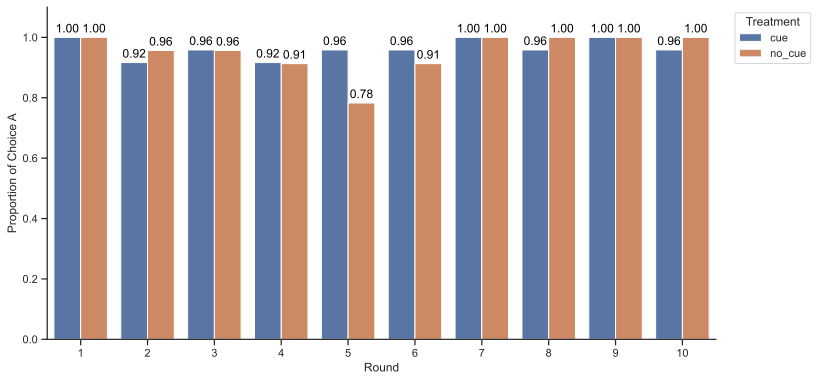

In [99]:
def plot_compare(df, x,y,hue,figsize=(12,6)):
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    # 设置图形大小
    plt.figure(figsize=figsize)

    # 使用seaborn的barplot函数绘制柱状图
    ax = sns.barplot(x=x, y=y, hue=hue, data=df)

    # 在柱体顶端添加数字
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')
    return ax


ax = plot_compare(choice_A_proportion,x='round', y='proportion', hue='treatment')

plt.xlabel('Round')
plt.ylabel('Proportion of Choice A')
ax.set_ylim([0,1.1])
# 设置图例位置
ax.legend(title='Treatment', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## 提议者选择A比例：按pareto

In [101]:
def sort_col_by_list(df,col='pareto', order=['week','not','strong']):
    """
    对于col列，按照指定的顺序排序
    :param df: 数据
    :param col: 指定的列
    :param order: 指定的顺序
    :return:
    """
    # 创建映射字典
    order_dict = {value: idx for idx, value in enumerate(order)}

    # 应用映射，然后使用argsort进行排序
    sorted_index = df[col].map(order_dict).argsort()

    # 根据排序后的索引重排DataFrame
    df = df.iloc[sorted_index].reset_index(drop=True)
    return df

In [102]:
choice_A_proportion = prop_df[prop_df['choice'] == 'A'].groupby(['pareto', 'treatment']).size() / prop_df.groupby(['pareto', 'treatment']).size()
choice_A_proportion = choice_A_proportion.reset_index(name='proportion')
choice_A_proportion = sort_col_by_list(choice_A_proportion)
choice_A_proportion


,pareto,treatment,proportion
0,week,cue,0.958333
1,week,no_cue,0.978261
2,not,cue,0.947917
3,not,no_cue,0.891304
4,strong,cue,0.979167
5,strong,no_cue,1.000000


### 对不同的帕累托组进行卡方检验

In [103]:
for i in ['week','not','strong']:
    tmp_df = prop_df.query('pareto in @i')
    #print(len(tmp_df))
    contingency_table = pd.crosstab(tmp_df['treatment'],tmp_df['choice'])
    #display(contingency_table)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"pareto '{i}',\t Chi2: {chi2:.2f}, p-value: {p_value:.2f}")


pareto 'week',	 Chi2: 0.00, p-value: 1.00
pareto 'not',	 Chi2: 1.35, p-value: 0.24
pareto 'strong',	 Chi2: 0.46, p-value: 0.50


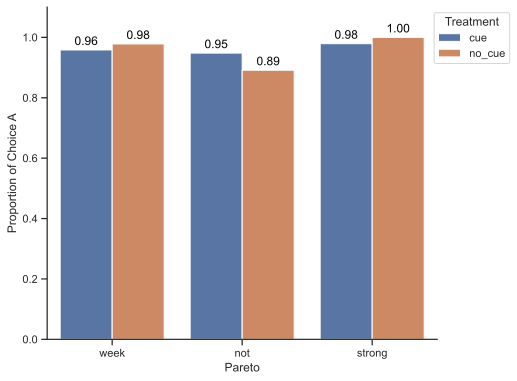

In [108]:
ax = plot_compare(choice_A_proportion,x='pareto', y='proportion', hue='treatment',figsize=(7,6))

plt.xlabel('Pareto')
plt.ylabel('Proportion of Choice A')
ax.set_ylim([0,1.1])
# 设置图例位置
ax.legend(title='Treatment', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


## 提议者选择A的比例